# VisNIR EDA

> Exploratory Data Analysis and outlier detection

In [ ]:
%load_ext autoreload
%autoreload 2

## Imports

In [ ]:
from pathlib import Path
from functools import partial

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# import timm
# from torcheval.metrics import R2Score
# from torch.optim import lr_scheduler
# from torch import optim, nn

import umap

from lssm.loading import load_ossl
from lssm.visualization import plot_spectra
from lssm.preprocessing import ToAbsorbance, ContinuumRemoval, Log1p, SNV
# from lssm.dataloaders import SpectralDataset, get_dls
# from lssm.callbacks import (MetricsCB, BatchSchedCB, BatchTransformCB,
#                             DeviceCB, TrainCB, ProgressCB)
# from lssm.transforms import GADFTfm, _resizeTfm, StatsTfm
# from lssm.learner import Learner

import matplotlib.pyplot as plt
import seaborn as sns
from palettable.tableau import Tableau_10


## Data loading & preprocessing

In [ ]:
analytes = 'k.ext_usda.a725_cmolc.kg'
spectra_type = 'visnir'

data = load_ossl(analytes, spectra_type)
X, y, X_names, smp_idx, ds_name, ds_label = data

X = Pipeline([('to_abs', ToAbsorbance()), 
              ('cr', ContinuumRemoval(X_names))]).fit_transform(X)

# y = Log1p().fit_transform(y)

Reading & selecting data ...


100%|██████████| 44489/44489 [00:16<00:00, 2640.12it/s]


## PCA

<Figure size 640x480 with 0 Axes>

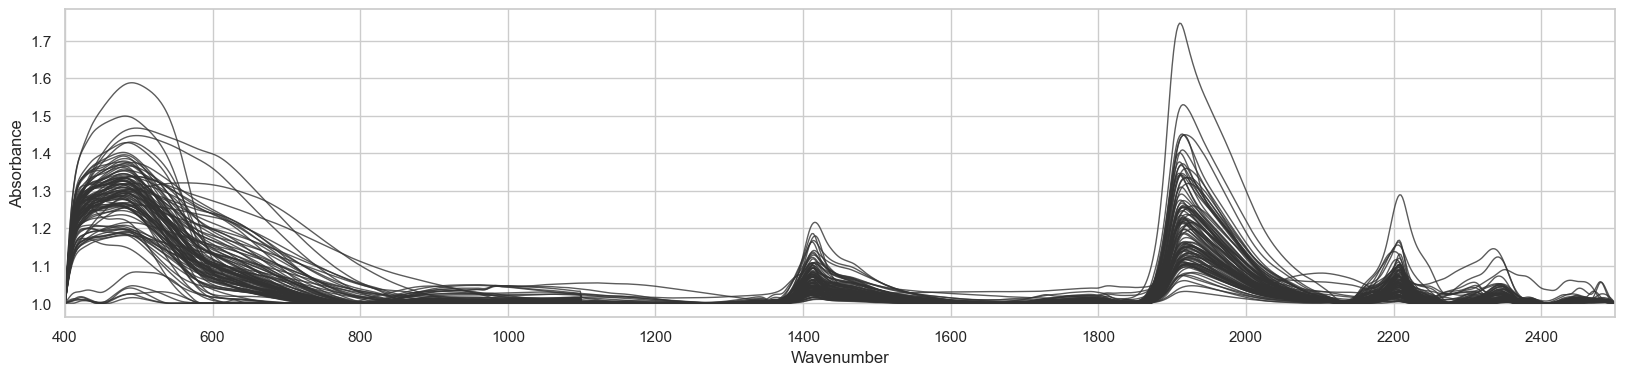

In [ ]:
plot_spectra(X, X_names, sample=100)

<Figure size 640x480 with 0 Axes>

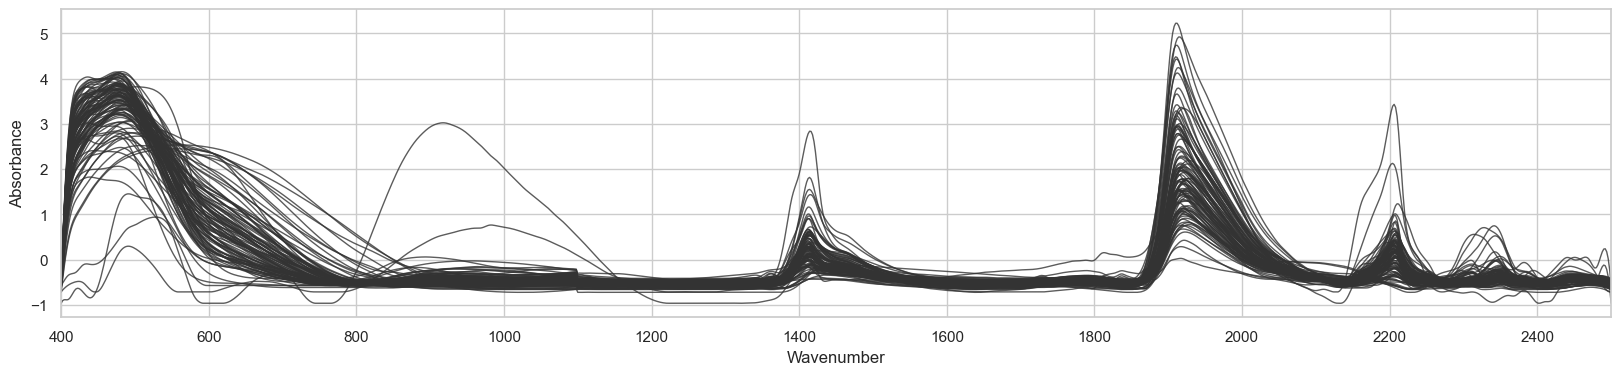

In [ ]:
plot_spectra(SNV().fit_transform(X), X_names, sample=100)

In [ ]:
ds_label

array(['ICRAF.ISRIC', 'KSSL.SSL', 'LUCAS.SSL', 'LUCAS.WOODWELL.SSL'],
      dtype=object)

In [ ]:
X_centered = (X - X.mean(axis=1, keepdims=True))
n_components = 20
pca = PCA(n_components=n_components)
ds = 2

X_pca = pca.fit_transform(SNV().fit_transform(X[ds_name==ds]))
# X_pca = pca.fit_transform(X_centered[ds_name == 2])
# X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

# X_pca = pca.fit_transform(SNV().fit_transform(X[ds_name == 2]))


In [ ]:
# n_components = 20
# n_sample = 1000
# ds = 2

# X_centered = (X - X.mean(axis=1, keepdims=True))
# idx = np.random.randint(len(X_centered[ds_name == ds]), size=n_sample)
# pca = KernelPCA(n_components=n_components)

# X_pca = pca.fit_transform(X_centered[ds_name == ds][idx,:])

In [ ]:
pca.explained_variance_ratio_

array([5.41952604e-01, 3.23881616e-01, 3.51052458e-02, 2.80151985e-02,
       1.77777725e-02, 1.33735961e-02, 8.43960519e-03, 6.94723136e-03,
       6.22437402e-03, 3.68800234e-03, 2.25434766e-03, 2.14942178e-03,
       1.69918997e-03, 1.48052371e-03, 9.88398406e-04, 8.57942707e-04,
       7.81120220e-04, 6.31589659e-04, 5.02816442e-04, 4.43493314e-04])

In [ ]:
# Compute cumulated explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_); cumsum

array([0.5419526 , 0.86583422, 0.90093947, 0.92895466, 0.94673244,
       0.96010603, 0.96854564, 0.97549287, 0.98171724, 0.98540525,
       0.98765959, 0.98980902, 0.99150821, 0.99298873, 0.99397713,
       0.99483507, 0.99561619, 0.99624778, 0.9967506 , 0.99719409])

<Figure size 640x480 with 0 Axes>

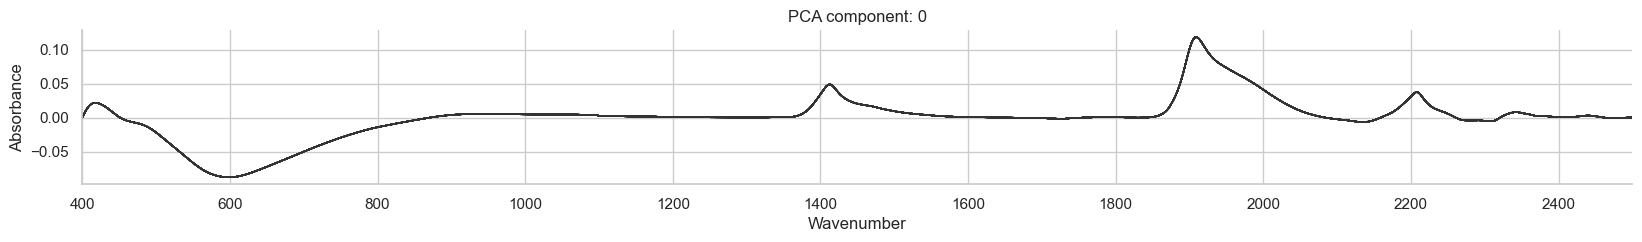

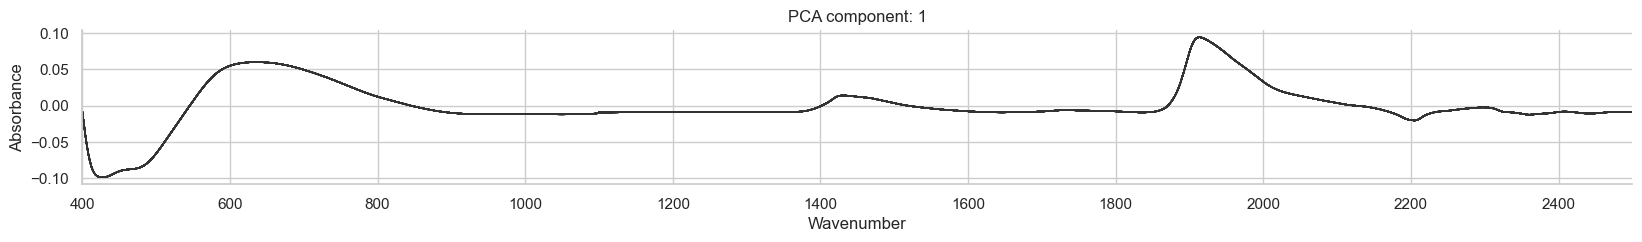

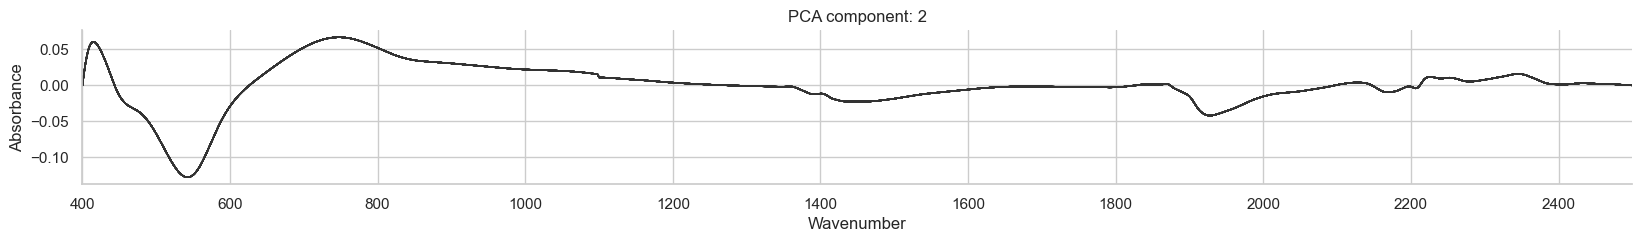

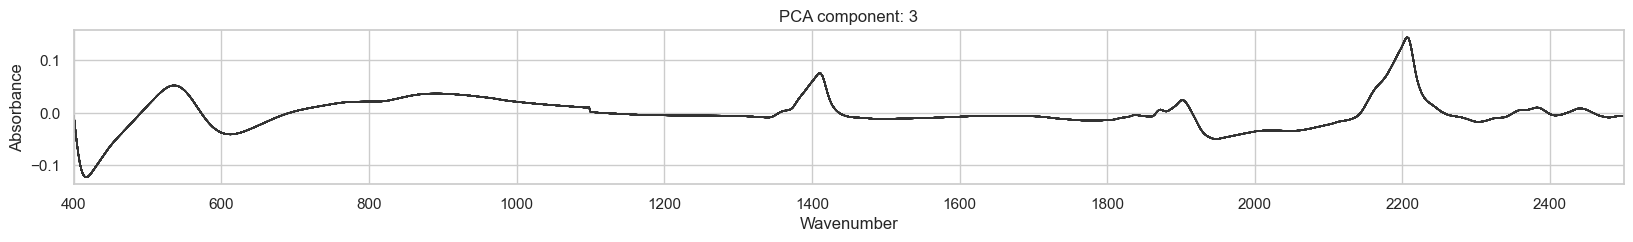

In [ ]:
for i in range(4):
    plot_spectra(pca.components_[i,:][None,:], X_names, 
                 alpha=0.8, color='#333', 
                 title=f'PCA component: {i}',
                 figsize=(20, 2))

<seaborn.axisgrid.JointGrid>

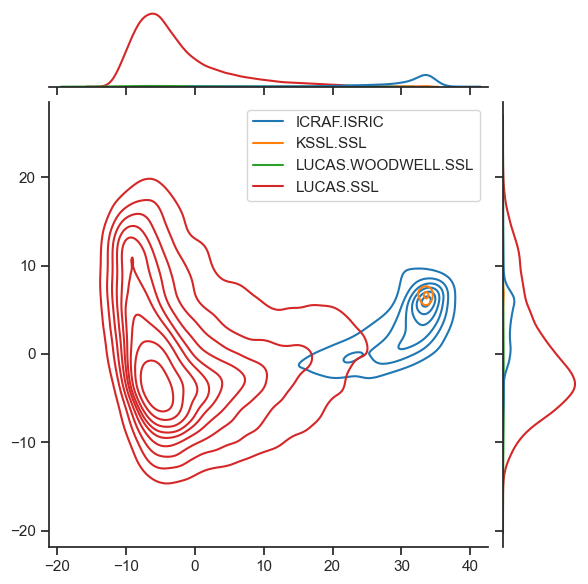

In [ ]:
sns.set_theme(style="ticks")
sns.jointplot(
    x=X_pca[:,0], y=X_pca[:,1], hue=[ds_label[n] for n in ds_name],
    kind="kde",
    palette=Tableau_10.mpl_colors
)

## Umap

In [ ]:
reducer = umap.UMAP(n_neighbors=15)
# embedding = reducer.fit_transform(X_pca[:,:10])
embedding = reducer.fit_transform(X_pca)

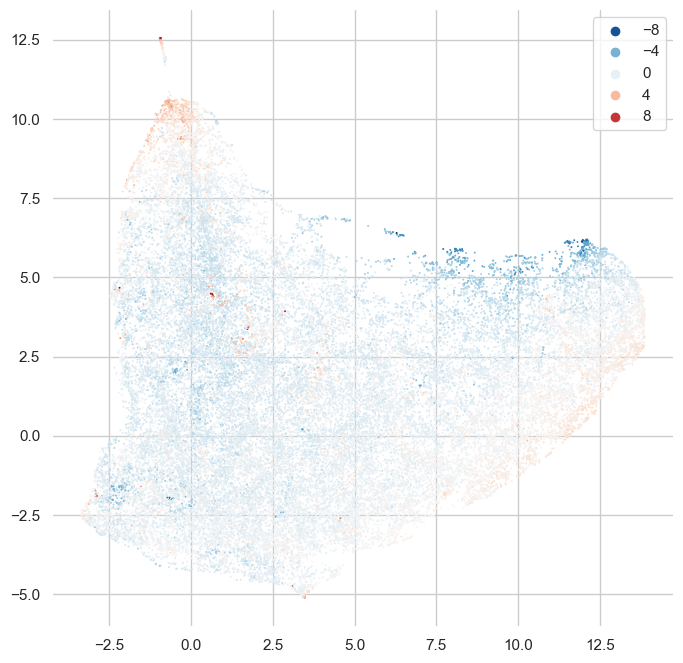

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.despine(f, left=True, bottom=True)

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.scatterplot(x=embedding[:,0], y=embedding[:,1],
                # hue=[ds_label[n] for n in ds_name],
                hue=X_pca[:,5],
                s=2,
                alpha=1,
                palette = "RdBu_r",
                linewidth=0,
                ax=ax);